# A/B Testing Assignment

In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Import the [Absenteeism at Work data set](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv). 

**Note:** The the delimiter of the file is a semi-colon (;), so you will need to set `sep=';`.

In [5]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')
df


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


## Confidence Intervals

Suppose this company is analyzing the health of its employees and is specifically interested in their Body Mass Index (BMI). Generate a 95% confidence interval of the mean for that field.

In [11]:
stats.t.interval(0.95, len(df), loc=np.mean(df['Body mass index']), scale=stats.sem(df['Body mass index']))

(26.367755602752805, 26.98629845130125)

### Visualizing Confidence Intervals

Generate a sampling distribution of the mean for the Body Mass Index field. Create a histogram to visualize the sampling distribution and add an indicator showing the lower and upper bounds of the confidence interval.

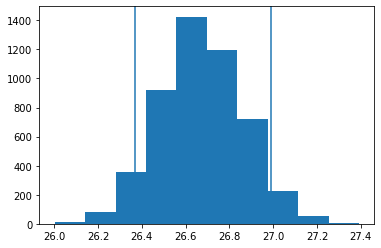

In [24]:
BMI = [df['Body mass index'].sample(500, replace=True).mean() for _ in range(5000)]
plt.hist(BMI)
plt.axvline(x=26.37)
plt.axvline(x=26.99)

### Confidence Intervals by Group

Suppose we wanted to examine whether there was a difference in the BMIs of employees who drink socially and those that do not. Use the Social Drinker field to split the employees into groups, and then compute the confidence intervals for each group. What insights can you derive from the results?

In [34]:
social_drinkers = df[df['Social drinker'] ==1]
non_drinkers = df[df['Social drinker']==0]
print(stats.t.interval(0.95, len(df), loc=np.mean(social_drinkers['Body mass index']), scale=stats.sem(social_drinkers['Body mass index'])))
BMI_drinkers = [social_drinkers['Body mass index'].sample(500, replace=True).mean() for _ in range(5000)]

print(stats.t.interval(0.95, len(df), loc=np.mean(non_drinkers['Body mass index']), scale=stats.sem(non_drinkers['Body mass index'])))
BMI_non_drinkers = [non_drinkers['Body mass index'].sample(500, replace=True).mean() for _ in range(5000)]




(27.499538177758378, 28.2766522984321)
(24.64213600824606, 25.53286399175394)


### Sampling Distributions for Each Group

Next, let's generate a sampling distribution of the mean for each group and generate a plot containing both of their histograms to see if there is any overlap.

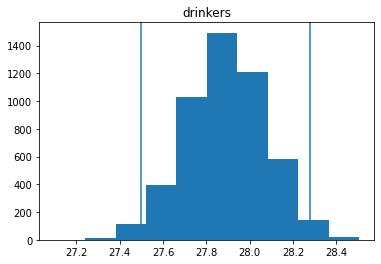

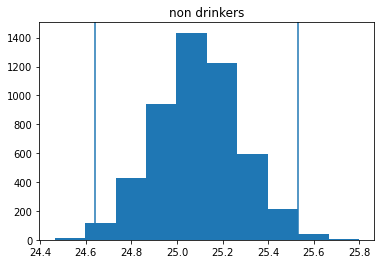

In [33]:
plt.figure()
plt.title('drinkers')
plt.hist(BMI_drinkers)
plt.axvline(x=27.50)
plt.axvline(x=28.28)

plt.figure()
plt.title('non drinkers')
plt.hist(BMI_non_drinkers)
plt.axvline(x=24.64)
plt.axvline(x=25.53)

## A/B Testing

Based on our analysis so far, we would like to perform a t-test to determine whether there is a difference in BMI means between our two groups (social drinkers and non-social drinkers). Conduct an independent sample t-test and determine whether the differences between the groups is statistically significant. What is your conclusion?

In [35]:
stats.ttest_ind(social_drinkers['Body mass index'], non_drinkers['Body mass index'])

Ttest_indResult(statistic=9.302990833389606, pvalue=1.5203894201359724e-19)

## Confidence Intervals for Group Differences

Generate a 95% confidence interval for the mean difference in BMI between the two groups. Compute the interval using both the traditional method and bootstrapping and compare the results. What conclusions can you draw from the comparison? How would you present a summary of your results to stakeholders?

Upper CI: 3.3898494785270756
Lower CI: 2.211340997663406


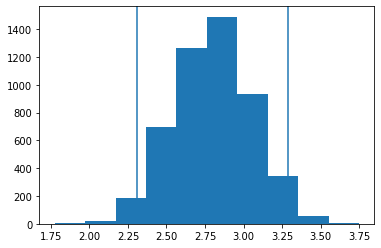

In [44]:
def get_95_ci(data1, data2): 
  avg1 = data1.mean() 
  avg2 = data2.mean() 
  var1 = (np.std(data1)) **2 
  var2 = (np.std(data2)) **2 
  upper = avg1 - avg2 + 1.96 * (var1/len(data1) + var2/len(data2)) **(1/2) 
  lower = avg1 - avg2 - 1.96 * (var1/len(data1) + var2/len(data2)) **(1/2) 
  print("Upper CI: " + str(upper)) 
  print("Lower CI: " + str(lower))

get_95_ci(social_drinkers['Body mass index'], non_drinkers['Body mass index'])
diff = pd.Series(BMI_drinkers) - pd.Series(BMI_non_drinkers)
lower = np.percentile(diff, 2.5)
upper = np.percentile(diff, 97.5)
plt.hist(diff)
plt.axvline(x=lower)
plt.axvline(x=upper)